In [1]:
import Dynamics_Res
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
import json
import util

In [2]:
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)

# Parameters
Two,Ttrain = 2000,100000

sigma = 0.1

fn_i = "10N_2din"
print("\r loading inputs")
u_sym = torch.load('./experiments/inputs/'+fn_i+'_i.pt',weights_only=False)
print("\r loading targets")
ti = torch.load('./experiments/target_info/10N_2din_ti.pt',weights_only=False)


#fn = r"henon_%.2f_s"%

## construct Henon map model
## run and washout 

henon = Dynamics_Res.Henon(sigma=sigma)
st = time.time()
Xwo = henon.run_washout(u_sym, Two)
print("runtime :",time.time()-st)

#torch.save(Xwo,f"./experiments/datamatrices/{fn}_d.pt")

## calculate ipc

st = time.time()
raw,thr,thr_scl,rev,sur = ESN.calc_capacity(Xwo,ti.tar_f,ret_all=True)
print("ipc :",time.time()-st)

cap = rev
totCapacity = torch.sum(cap)

ipc=ESN.IPC_w_targetinfo(cap,ti)

#torch.save(ipc,f"./experiments/ipcs/{fn}_ipc.pt")
#torch.save(raw,f"./experiments/ipcs/{fn}_raw.pt")
#torch.save(sur,f"./experiments/ipcs/{fn}_sur.pt")

print("totoal capacity:",totCapacity)

util.print_ipc(ipc)


 loading inputs
 loading targets
runtime : 27.474804162979126
set threshold scale value: thr_scale= None
ipc : 0.45831751823425293
totoal capacity: tensor(2.0376, device='cuda:0')


TypeError: print_ipc() missing 1 required positional argument: 'ipc'

1 deg ipc: 2.008567794576108
2 deg ipc: -8.888804365051284e-05
3 deg ipc: 0.003222733719979762
4 deg ipc: 0.011340466076005688
5 deg ipc: 0.010427209688610294
6 deg ipc: 0.0031506470114550317
7 deg ipc: 0.0009852070847903025
total ipc: 2.0376051701132982


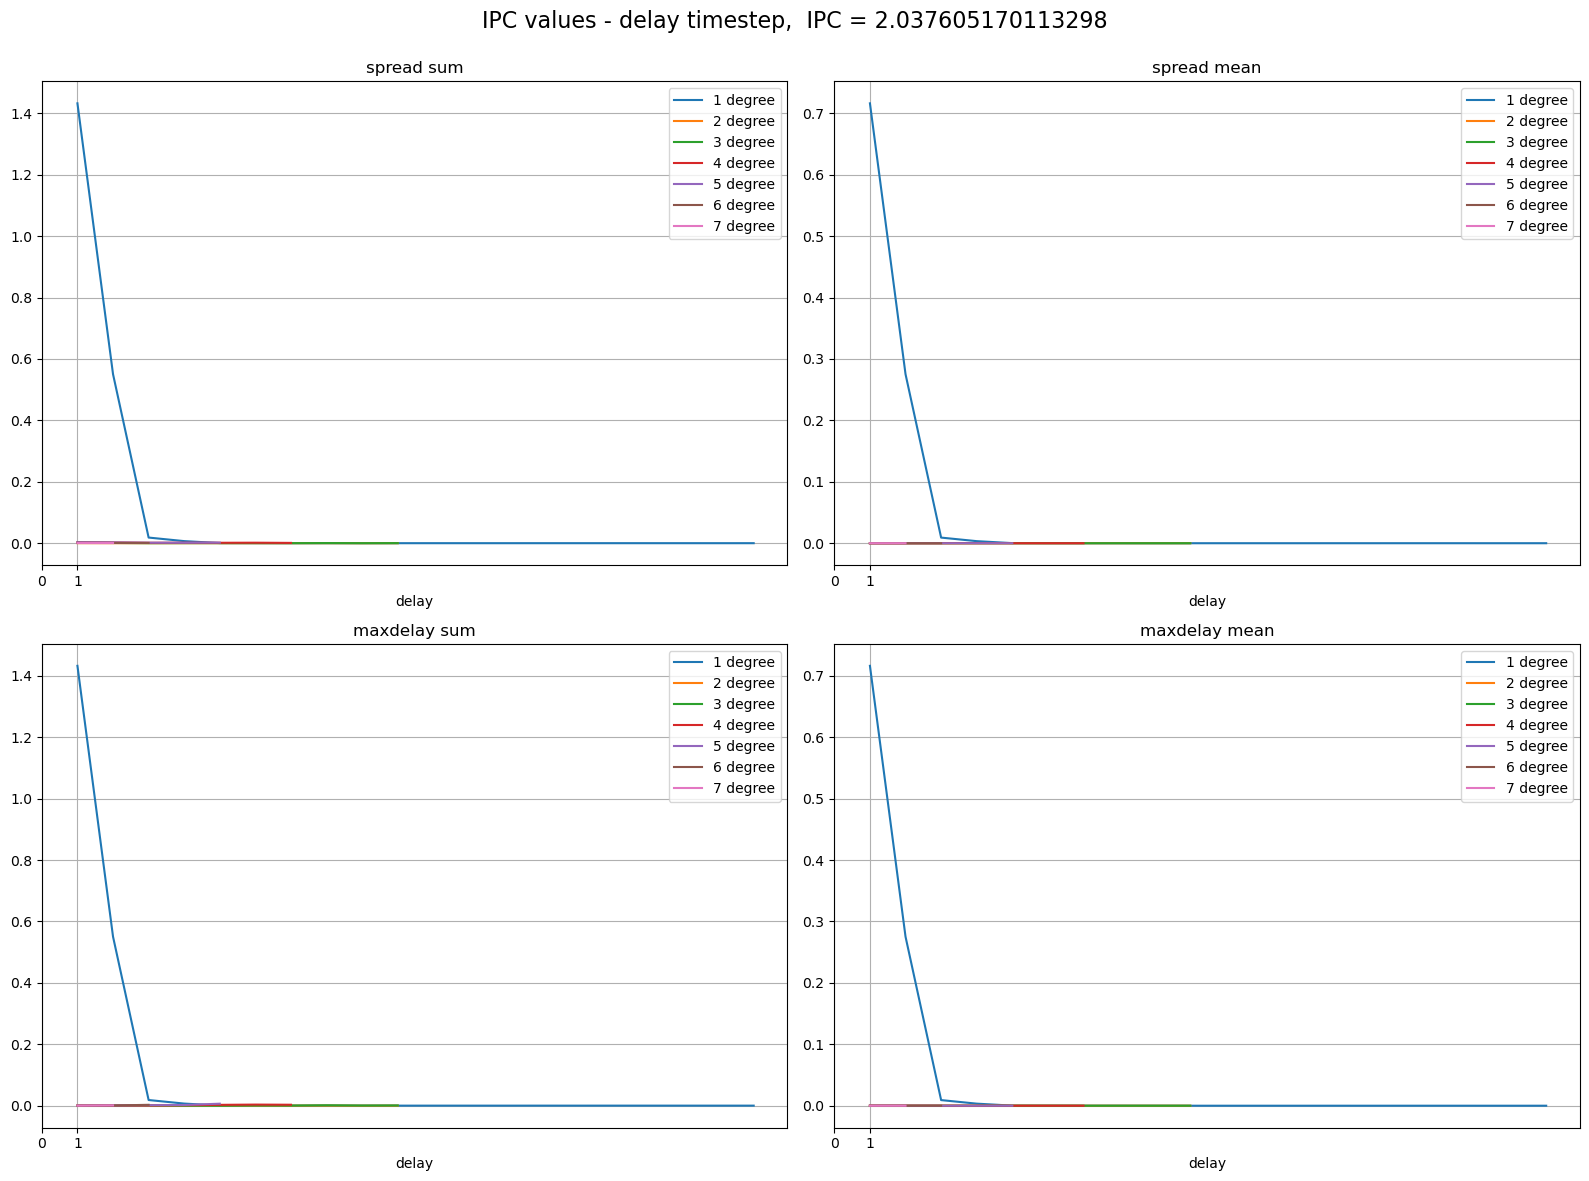

In [3]:
util.print_ipc(ipc)

util.ipc_tau_plot(ipc)